<a href="https://colab.research.google.com/github/jermwatt/machine_learning_refined/blob/main/notes/2_Zero_order_methods/2_2_Zero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chapter 2: Zero order methods

# The Zero-Order Optimality Condition

The mathematical problem of the smallest point(s) of a function - referred to as a function's *global minimum* (one point) or *global minima* (many) - is a centuries old pursuit and has applications throughout the sciences and engineering.  In this Section we describe most basic mathematical definition of a function's minima - called the *zero-order condition*. 

In [ ]:
# import standard libs
import os

# if on collab pull required subdirectories
if os.getenv("COLAB_RELEASE_TAG"): 
    # install github clone - allows for easy cloning of subdirectories
    !pip install github-clone
    from pathlib import Path 

    # clone library subdirectory
    if not Path('chapter_2_library').is_dir():
        !ghclone https://github.com/jermwatt/machine_learning_refined/tree/main/notes/2_Zero_order_methods/chapter_2_library
    else:
        print('chapter_2_library already cloned!')

# append path for local library, data, and image import
import sys
sys.path.append('./chapter_2_library')

# import section helper
import section_2_2_helpers

# standard imports
import matplotlib.pyplot as plt

# import autograd-wrapped numpy
import autograd.numpy as np

# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

## The zero order definitions

In many areas of science and engineering one is interested in finding the smallest points - or the global minima - of a particular function.  For a function $g(\mathbf{w})$ taking in a general $N$ dimensional input $\mathbf{w}$ this problem is formally phrased as 

\begin{equation}
\underset{\mathbf{w}}{\mbox{minimize}}\,\,\,\,g\left(\mathbf{w}\right)
\end{equation}

This says formally 'look over every possible input $\mathbf{w}$ and find the one that gives the smallest value of $g(\mathbf{w})$'.

When a function takes in only one or two inputs we can attempt to identify its minima visually by plotting it over a large swath of its input space.  However this idea completely fails when a function takes in three or more inputs - since obviously we can no longer effectively visualize it.  However because we are such visual creatures it always helps to draw pictures to ease the translation from intuition to mathematical definition.  
So lets visually examine a few simple examples.  In each case keep in mind how you would describe a minimum point - in plain English.  After each picture we will then codify this intuitive understanding - forming our first formal definition of minimum points.

#### <span style="color:#a50e3e;">Example 1: </span> Global minima of a quadratic

Below we plot the simple quadratic

\begin{equation}
g(w) = w^2
\end{equation}

over a short region of its input space.  Examining the left panel below, what can we say defines the smallest value(s) of the function here?  Certainly - to state the obvious - that it is smaller than any other point on the function.

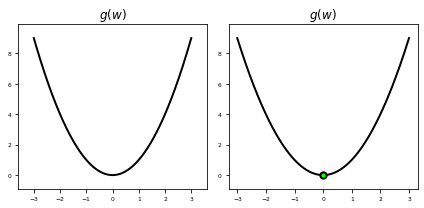

In [2]:
# specify function
func = lambda w: w**2

# use custom plotter to display function
section_2_2_helpers.show_stationary_1func(func=func)

More specifically the smallest value - the global minimum of this function - seemingly occurs close to $w^{\star} = 0$ (we mark this point $(0,g(0))$ in the right panel with a green dot). 

Formally then to state mathematically that a point $w^{\star}$ gives the smallest point on the function, that it is smaller than any other point on the function, is to say 

\begin{equation}
g(w^{\star}) \leq g(w) \,\,\,\text{for all $w$}.
\end{equation}

This direct translation of what we know to be intuitively true into mathematics is called the *zero-order definition of a global minimum point*.

#### <span style="color:#a50e3e;">Example 2: </span> Global maxima of a quadratic

Remember what happens if we multiply the quadratic function in the previous example by $-1$, as plotted below.  The function flips upside down - now its global minima lie at $w^{\star} = \pm \infty$.  Now the point $w^{\star} = 0$ that used to be a *global minimum* is a *global maximum* - i.e., the largest point on the function (and is marked in green in the right panel below).  

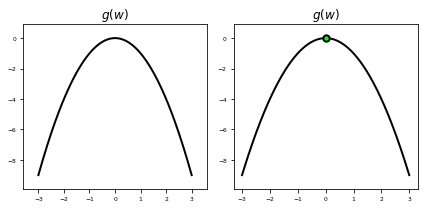

In [3]:
# specify function
func = lambda w: -w**2

# use custom plotter to display function
section_2_2_helpers.show_stationary_1func(func=func)

How do we formally define a *global maximum*?  Just like the global minimum in the previous example - it is the point that is larger than any other on the function i.e., 

\begin{equation}
g(w^{\star}) \geq g(w) \,\,\,\text{for all $w$}.
\end{equation}

This direct translation of what we know to be intuitively true into mathematics is called the *zero-order definition of a global maximum point*.

These concepts of *minima* and *maxima* of a function are always related to each via multiplication by $-1$.  That is, any point that is a minima of a function $g$ is a maxima of the function $-g$, and vice-versa.  

To express our pursuit of a global *maxima* of a function we write

\begin{equation}
\underset{\mathbf{w}}{\mbox{maximize}}\,\,\,\,g\left(\mathbf{w}\right).
\end{equation}

But since minima and maxima are so related, we can always express this in terms of our $\mbox{minimize}$ notation as

\begin{equation}
\underset{\mathbf{w}}{\mbox{maximize}}\,\,\,\,g\left(\mathbf{w}\right) = 
-\underset{\mathbf{w}}{\mbox{minimize}}\,\,\,\,g\left(\mathbf{w}\right).
\end{equation}

#### <span style="color:#a50e3e;">Example 3:</span>  Global minima/maxima of a sinusoid

Let us look at the sinusoid function

\begin{equation}
g(w) = \text{sin}(2w)
\end{equation}

plotted by the next Python cell, looking to visually identify both minima and maxima.  Here we can clearly see that - over the range we have plotted the function - that there are two global minima and two global maxima (marked by green dots in the right panel).  We can imagine as well of course that there are further minima and maxima (here one exists at every $4k+3$ multiple of $\frac{\pi}{2}$ for integer $k$'s).  So this is just an example where - technically speaking - the function has an infinite number of global minima and maxima.

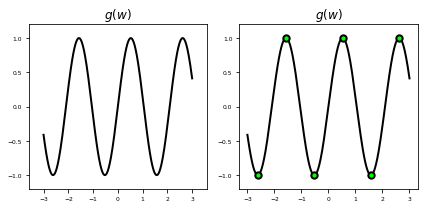

In [4]:
# specify function
func = lambda w: np.sin(3*w)

# use custom plotter to display function
section_2_2_helpers.show_stationary_1func(func=func)

#### <span style="color:#a50e3e;">Example 4:</span>  Minima and maxima of the sum of a sinusoid and a quadratic

Lets look at a weighted sum of the previous two examples, the function 

\begin{equation}
g(w) = \text{sin}(3w) + 0.1w^2
\end{equation}

over a short region of its input space.  Examining the left panel below, what can we say defines the smallest value(s) of the function here?

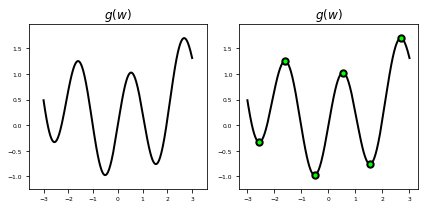

In [5]:
# specify function
func = lambda w: np.sin(3*w) + 0.1*w**2

# use custom plotter to display function
section_2_2_helpers.show_stationary_1func(func=func)

Here we have a global minimum around $w^{\star} = -0.5$ and a global maximum around $w^{\star} = 2.7$.  We also have minima and maxima that are *locally optimal* - for example the point around $w^{\star} = 0.8$ is a local maximum.  Likewise the point near $w^{\star} = 1.5$ is a *local minimum*  - since it is the smallest point on the function nearby.  We can formally say that the point $w^{\star}$ is a local minimum of the function $g(w^{\star})$ as

\begin{equation}
g(w^{\star}) \leq g(w) \,\,\,\text{for all $w$ near $w^{\star}$}
\end{equation}

The statement $\text{for all $w$ near $w^{\star}$}$ is relative, and simply describes the fact that the point $w^{\star}$ is smaller than its neighboring points.  This is the *zero-order definition of local minima*.  The same formal definition can be made for local maximum points as well, switching the $\leq$ sign to $\geq$, just as in the case of global minima/maxima.

##  The zero order condition for optimality

From these examples we have seen how to formally define global minima/maxima as well as the local minima/maxima of functions we can visualize.  These formal definitions directly generalize to a function of any dimension - in general taking in $N$ inputs.  Packaged together these zero-order conditions are often referred to as *the zero-order condition for optimality*.

> **The zero order condition for optimality:** A point $\mathbf{w}^{\star}$ is 
- a global minimum of $g(\mathbf{w})$ if and only if $g(\mathbf{w}^{\star}) \leq  g(\mathbf{w}) \,\,\,\text{for all $\mathbf{w}$}$  
- a global maximum of $g(\mathbf{w})$ if and only if $g(\mathbf{w}^{\star}) \geq  g(\mathbf{w}) \,\,\,\text{for all $\mathbf{w}$}$ 
- a local minimum of $g(\mathbf{w})$ if and only if $g(\mathbf{w}^{\star}) \leq  g(\mathbf{w}) \,\,\,\text{for all $\mathbf{w}$ near $\mathbf{w}^{\star}$}$  
- a local maximum of $g(\mathbf{w})$ if and only if $g(\mathbf{w}^{\star}) \geq  g(\mathbf{w}) \,\,\,\text{for all $\mathbf{w}$ near $\mathbf{w}^{\star}$}$  

##  The zero order jargon, in context

Here we have seen zero-order definitions of various important points of a function.  Why are these called *zero-order* conditions?  Because each of their definitions involves only a function itself - and nothing else.  This bit of jargon - 'zero-order'- is commonly used when discussing a mathematical function in the context of calculus where we can have *first-order*, *second-order*, etc., derivatives e.g., a zero-order derivative of a function is just the function itself.  In the future we will see *higher order* definitions of optimal points e.g., *first-order* definitions that involve the first derivative of a function and *second-order* definitions involving a function's second derivative.